In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("../data/women_in_tech_cleaned.csv")

# Quick look
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (251, 7)


,key,company,team,num_female_eng,num_eng,percent_female_eng,last_updated
0,all,ALL,NaN,2979,15967,18.66,2016-03-15
1,wellsfargo,Wells Fargo,NaN,1296,5407,23.97,2015-07-22
2,thoughtworks,ThoughtWorks,NaN,337,1425,23.65,2014-05-19
3,mozilla,Mozilla,NaN,43,500,8.60,2013-10-23
4,athenahealth,athenahealth,NaN,75,473,15.86,2016-02-25


In [2]:
# Quick info about dataset
df.info()

# Summary statistics for numeric columns
df.describe()

# Check for any missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key                 251 non-null    object 
 1   company             251 non-null    object 
 2   team                15 non-null     object 
 3   num_female_eng      251 non-null    int64  
 4   num_eng             251 non-null    int64  
 5   percent_female_eng  251 non-null    float64
 6   last_updated        251 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 13.9+ KB


key                     0
company                 0
team                  236
num_female_eng          0
num_eng                 0
percent_female_eng      0
last_updated            0
dtype: int64

In [3]:
import pandas as pd

# Top 10 companies with highest % of female engineers
top_percent = df.sort_values(by='percent_female_eng', ascending=False).head(10)
top_percent[['company', 'percent_female_eng']]


,company,percent_female_eng
247,Kabinet,100.00
250,Tog+Porter,100.00
248,HIPAA Risk Management,100.00
242,Spitfire Athlete,100.00
182,Northwest Independent Ruby Development,87.50
217,The Muse,75.00
228,Hackbright Academy,66.67
233,Wizard Development,66.67
229,Glassbreakers,66.67
237,Yellowsmith,66.67


In [4]:
top_female_count = df.sort_values(by='num_female_eng', ascending=False).head(10)
top_female_count[['company', 'num_female_eng']]

,company,num_female_eng
0,ALL,2979
1,Wells Fargo,1296
2,ThoughtWorks,337
4,athenahealth,75
6,Pinterest,60
3,Mozilla,43
5,Dropbox,42
7,Airbnb,38
26,City of Los Angeles Information Technology Agency,33
9,The Washington Post,31


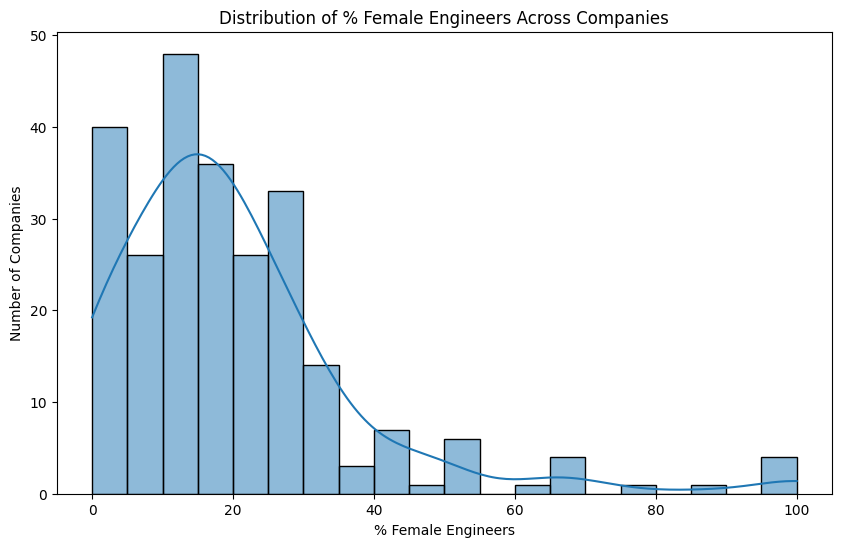

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['percent_female_eng'], bins=20, kde=True)
plt.title("Distribution of % Female Engineers Across Companies")
plt.xlabel("% Female Engineers")
plt.ylabel("Number of Companies")
plt.show()


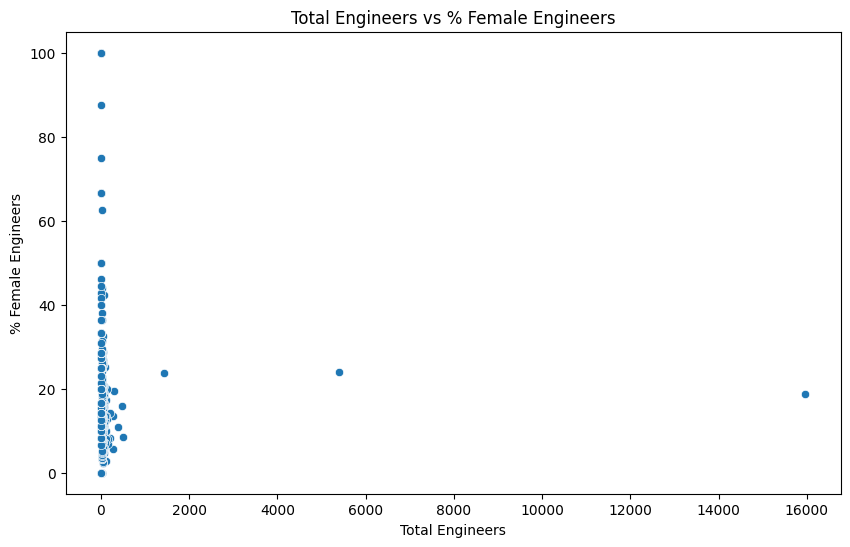

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='num_eng', y='percent_female_eng')
plt.title("Total Engineers vs % Female Engineers")
plt.xlabel("Total Engineers")
plt.ylabel("% Female Engineers")
plt.show()


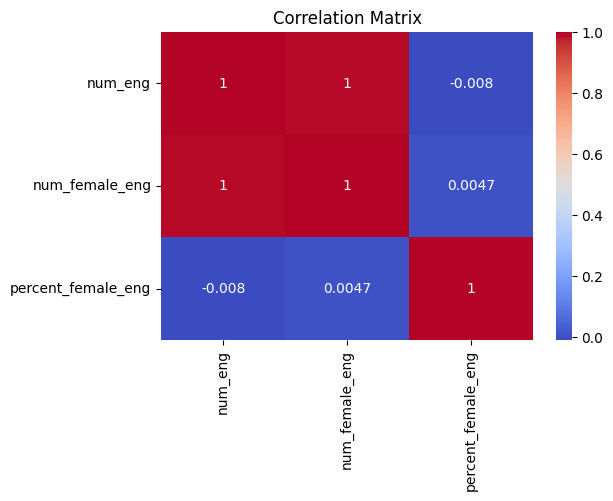

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['num_eng', 'num_female_eng', 'percent_female_eng']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [8]:
# Lowest % female engineers
low_percent = df.nsmallest(10, 'percent_female_eng')
print("Lowest % female engineers:\n", low_percent[['company', 'percent_female_eng']])

# Highest % female engineers
high_percent = df.nlargest(10, 'percent_female_eng')
print("\nHighest % female engineers:\n", high_percent[['company', 'percent_female_eng']])


Lowest % female engineers:
                 company  percent_female_eng
86             Nextdoor                 0.0
113           Guidebook                 0.0
124  Fog Creek Software                 0.0
143             Harvest                 0.0
149           Moontoast                 0.0
150     Collective IDea                 0.0
153            StackMob                 0.0
171        creativeLIVE                 0.0
175               Topix                 0.0
181            Massdrop                 0.0

Highest % female engineers:
                                     company  percent_female_eng
242                        Spitfire Athlete              100.00
247                                 Kabinet              100.00
248                   HIPAA Risk Management              100.00
250                              Tog+Porter              100.00
182  Northwest Independent Ruby Development               87.50
217                                The Muse               75.00
228       

In [ ]:
if 'team' in df.columns:
    team_data = df[df['team'].notnull()]
    top_teams = team_data.groupby('team')['percent_female_eng'].mean().sort_values(ascending=False).head(10)
    print("Top teams by % female engineers:\n", top_teams)
